In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Independent Sampler

In [3]:
from cosmic.sample.initialbinarytable import InitialBinaryTable
from cosmic.sample.sampler import independent

In [4]:
InitialBinaries, mass_singles, mass_binaries, n_singles, n_binaries = InitialBinaryTable.sampler('independent', final_kstar1=[14], final_kstar2=[14], binfrac_model=1.0, primary_model='kroupa93', ecc_model='sana12', porb_model='sana12', qmin=-1, SF_start=13700.0, SF_duration=0.0, met=0.02, size=10000)

Text(0, 0.5, '$m_2$')

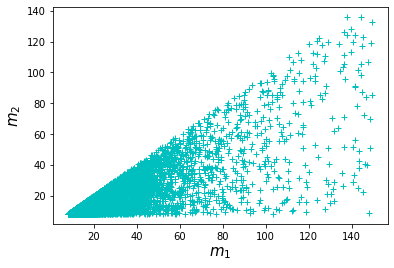

In [5]:
plt.plot(InitialBinaries.mass_1,InitialBinaries.mass_2,"c+")
plt.xlabel(r"$m_1$",size=15)
plt.ylabel(r"$m_2$",size=15)

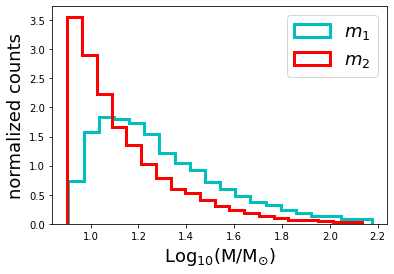

In [6]:
plt.hist(np.log10(InitialBinaries.mass_1), bins = 20, histtype='step', density=True,
         lw=3, color="c", label='$m_1$')
plt.hist(np.log10(InitialBinaries.mass_2), bins = 20, histtype='step', density=True,
         lw=3, color="r", label='$m_2$')
plt.xlabel(r'Log$_{10}$(M/M$_{\odot}$)', size=18)
plt.ylabel('normalized counts', size=18)
plt.legend()
plt.legend(prop={'size' : 18})
plt.show()

## Evolving the population

In [7]:
from cosmic.evolve import Evolve

In [8]:
BSEDict = {'xi': 1.0, 'bhflag': 1, 'neta': 0.5, 'windflag': 3, 'wdflag': 1, 'alpha1': 1.0, 'pts1': 0.001, 'pts3': 0.02, 'pts2': 0.01, 'epsnov': 0.001, 'hewind': 0.5, 'ck': 1000, 'bwind': 0.0, 'lambdaf': 0.0, 'mxns': 3.0, 'beta': -1.0, 'tflag': 1, 'acc2': 1.5, 'grflag' : 1, 'remnantflag': 4, 'ceflag': 0, 'eddfac': 1.0, 'ifflag': 0, 'bconst': 3000, 'sigma': 265.0, 'gamma': -2.0, 'pisn': 45.0, 'natal_kick_array' : [[-100.0,-100.0,-100.0,-100.0,0.0], [-100.0,-100.0,-100.0,-100.0,0.0]], 'bhsigmafrac' : 1.0, 'polar_kick_angle' : 90, 'qcrit_array' : [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0], 'cekickflag' : 2, 'cehestarflag' : 0, 'cemergeflag' : 0, 'ecsn' : 2.25, 'ecsn_mlow' : 1.6, 'aic' : 1, 'ussn' : 0, 'sigmadiv' :-20.0, 'qcflag' : 1, 'eddlimflag' : 0, 'fprimc_array' : [2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0], 'bhspinflag' : 0, 'bhspinmag' : 0.0, 'rejuv_fac' : 1.0, 'rejuvflag' : 0, 'htpmb' : 1, 'ST_cr' : 1, 'ST_tide' : 1, 'bdecayfac' : 1, 'rembar_massloss' : 0.5, 'kickflag' : 0, 'zsun' : 0.014, 'bhms_coll_flag' : 0, 'don_lim' : -1, 'acc_lim' : -1}

In [9]:
bpp, bcm, initC, kick_info  = Evolve.evolve(initialbinarytable=InitialBinaries, BSEDict=BSEDict)

/home/pranav/miniconda3/envs/cosmic/lib/python3.7/site-packages/cosmic/utils.py:1445: UserWarning: At least one of your initial binaries is starting in Roche Lobe Overflow:
       kstar_1  kstar_2      mass_1      mass_2      porb       ecc  \
30         1.0      1.0   54.890385   35.036370  1.559340  0.507556   
78         1.0      1.0   46.750277   42.210595  1.553528  0.203208   
85         1.0      1.0  101.259086   12.075909  1.762753  0.792075   
283        1.0      1.0   53.625969   45.415041  1.737006  0.026417   
402        1.0      1.0   51.904967   21.295048  1.575434  0.825395   
...        ...      ...         ...         ...       ...       ...   
10225      1.0      1.0   96.147214   65.205433  1.770970  0.685942   
10252      1.0      1.0   76.790913   51.616390  1.791133  0.193410   
10295      1.0      1.0  128.914383  119.966861  2.556736  0.892357   
10303      1.0      1.0   47.451277   44.035582  1.681015  0.183264   
10507      1.0      1.0   43.006901   38.92153

In [10]:
bcm

,tphys,kstar_1,mass0_1,mass_1,lum_1,rad_1,teff_1,massc_1,radc_1,menv_1,...,porb,sep,ecc,B_1,B_2,SN_1,SN_2,bin_state,merger_type,bin_num
0,0.0,1.0,15.167820,15.167820,2.054454e+04,5.357043,29990.322202,0.000000,0.000000,1.000000e-10,...,20390.692672,9378.089303,0.039661,0.000000e+00,0.000000e+00,0.0,0.0,0,-001,0
0,13700.0,13.0,14.526880,1.604634,1.465670e-10,0.000014,5391.562179,1.604634,0.000014,1.000000e-10,...,-1.000000,-1.000000,-1.000000,8.972532e+10,2.935141e+10,1.0,1.0,2,-001,0
1,0.0,1.0,15.982661,15.982661,2.391948e+04,5.532101,30655.787482,0.000000,0.000000,1.000000e-10,...,11.142281,61.537129,0.533777,0.000000e+00,0.000000e+00,0.0,0.0,0,-001,1
1,13700.0,15.0,3.038281,0.000000,1.299576e-03,0.000014,294209.057131,0.000000,0.000014,1.000000e-10,...,0.000000,0.000000,-1.000000,3.041786e+11,1.697190e+10,1.0,1.0,1,0213,1
2,0.0,1.0,24.343860,24.343860,7.460841e+04,7.196917,35718.507207,0.000000,0.000000,1.000000e-10,...,4567.642152,4142.621908,0.040510,0.000000e+00,0.000000e+00,0.0,0.0,0,-001,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10573,13700.0,13.0,5.402921,1.878981,1.627791e-10,0.000014,5534.842504,1.878981,0.000014,1.000000e-10,...,-1.000000,-1.000000,-1.000000,1.348319e+11,0.000000e+00,1.0,1.0,2,-001,10573
10574,0.0,1.0,13.789986,13.789986,1.548801e+04,5.054080,28770.502840,0.000000,0.000000,1.000000e-10,...,219760.713301,45002.488438,0.018758,0.000000e+00,0.000000e+00,0.0,0.0,0,-001,10574
10574,13700.0,13.0,13.253556,1.434673,1.360153e-10,0.000014,5291.789316,1.434673,0.000014,1.000000e-10,...,-1.000000,-1.000000,-1.000000,3.382017e+10,9.315885e+10,1.0,1.0,2,-001,10574
10575,0.0,1.0,13.175263,13.175263,1.349384e+04,4.915808,28184.220925,0.000000,0.000000,1.000000e-10,...,5047.956145,3533.323828,0.047137,0.000000e+00,0.000000e+00,0.0,0.0,0,-001,10575


In [11]:
bh_index_1 = np.array(bcm[bcm.kstar_1==14.0].index)
bh_final_m1 = np.array(bcm[bcm.kstar_1==14.0].mass_1)

bh_index_2 = np.array(bcm[bcm.kstar_2==14.0].index)
bh_final_m2 = np.array(bcm[bcm.kstar_2==14.0].mass_2)

In [12]:
bh_ini_m1 = []
bh_ini_m2 = []

In [13]:
for indx in bh_index_1:
    bh_ini_m1.append(np.array(bcm[bcm.index==indx].mass_1)[0])
    
for indx in bh_index_2:
    bh_ini_m2.append(np.array(bcm[bcm.index==indx].mass_2)[0])

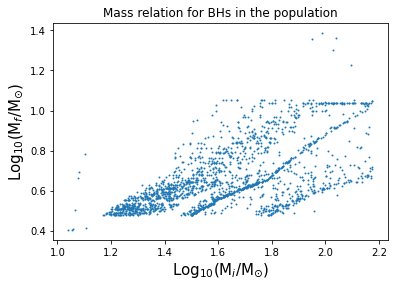

In [17]:
plt.scatter(np.log10(bh_ini_m1),np.log10(bh_final_m1),s=0.9,label="m1")
#plt.scatter(np.log10(bh_ini_m2),np.log10(bh_final_m2),s=0.4,label="m2")
plt.xlabel(r'Log$_{10}$(M$_{i}$/M$_{\odot}$)', size=15)
plt.ylabel(r'Log$_{10}$(M$_{f}$/M$_{\odot}$)', size=15)
#plt.legend()
plt.title("Mass relation for BHs in the population")
#plt.xlim(1.5,1.8)
#plt.ylim(0.45,0.7)
plt.show()
#plt.scatter(np.log10(bh_ini_m2+bh_ini_m1),np.log10(bh_final_m2+bh_ini_m2),s=0.4)

In [ ]:
q2 = bh_final_m2/bh_ini_m2

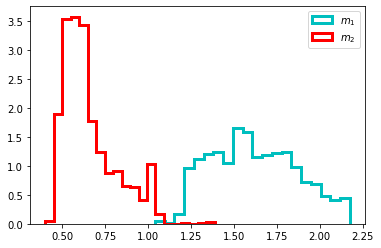

In [168]:
plt.hist(np.log10(bh_ini_m1), bins = 20, histtype='step', density=True,
         lw=3, color="c", label='$m_1$')
plt.hist(np.log10(bh_final_m1), bins = 20, histtype='step', density=True,
         lw=3, color="r", label='$m_2$')
#plt.xscale('log')
plt.legend()
plt.show()

In [82]:
mia = 1.5; mib = 1.8; mic = 2.2;
mfa = 0.45; mfb = 0.65; mfc = 1.0;

In [83]:
m_bh = pd.DataFrame({'m1_ini': bh_ini_m1, 'm1_final': bh_final_m1,'m2_ini': bh_ini_m1, 'm2_final': bh_final_m1})

(0.45, 0.65)

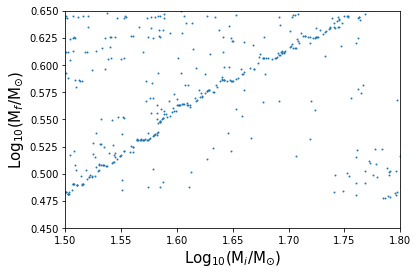

In [84]:
plt.scatter(np.log10(bh_ini_m1),np.log10(bh_final_m1),s=0.9,label="m1")
#plt.scatter(np.log10(bh_ini_m2),np.log10(bh_final_m2),s=0.4,label="m2")
plt.xlabel(r'Log$_{10}$(M$_{i}$/M$_{\odot}$)', size=15)
plt.ylabel(r'Log$_{10}$(M$_{f}$/M$_{\odot}$)', size=15)
plt.xlim(mia,mib)
plt.ylim(mfa,mfb)

In [85]:
def get_alpha(mi1,mi2,mf1,mf2):
    m1_bh_sort1  = m_bh[np.log10(m_bh["m1_ini"])>mi1]
    m1_bh_sort2 = m1_bh_sort1[np.log10(m1_bh_sort1["m1_ini"])<mi2]
    m1_bh_sort3 = m1_bh_sort2[np.log10(m1_bh_sort2["m1_final"])>mf1]
    m1_bh_sort4 = m1_bh_sort3[np.log10(m1_bh_sort3["m1_final"])<mf2]
    
    m,b = np.polyfit(np.log10(m1_bh_sort4["m1_ini"]),np.log10(m1_bh_sort4["m1_final"]),1)
    print(m,b)
    
    return m,b
    

In [86]:
alpha1,b1 = get_alpha(1.50,1.55,0.476,0.520)

0.6547493207548013 -0.4962329374995647


(0.65, 1.0)

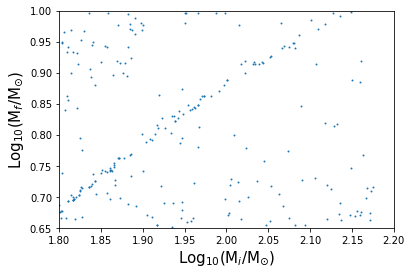

In [87]:
plt.scatter(np.log10(bh_ini_m1),np.log10(bh_final_m1),s=0.9,label="m1")
#plt.scatter(np.log10(bh_ini_m2),np.log10(bh_final_m2),s=0.4,label="m2")
plt.xlabel(r'Log$_{10}$(M$_{i}$/M$_{\odot}$)', size=15)
plt.ylabel(r'Log$_{10}$(M$_{f}$/M$_{\odot}$)', size=15)
plt.xlim(mib,mic)
plt.ylim(mfb,mfc)

In [88]:
alpha2,b2 = get_alpha(1.80,1.85,0.67,0.75)

0.8346785547597865 -0.8155724734392871


In [89]:
M1_bh_sort1  = m_bh[np.log10(m_bh["m1_ini"])>mia]
M1_bh_sort2 = M1_bh_sort1[np.log10(M1_bh_sort1["m1_ini"])<mib]
M1_bh_sort3 = M1_bh_sort2[np.log10(M1_bh_sort2["m1_final"])>mfa]
M1_bh_sort4 = M1_bh_sort3[np.log10(M1_bh_sort3["m1_final"])<mfb]

In [90]:
Mb_bh_sort1  = m_bh[np.log10(m_bh["m1_ini"])>mib]
Mb_bh_sort2 = Mb_bh_sort1[np.log10(Mb_bh_sort1["m1_ini"])<mic]
Mb_bh_sort3 = Mb_bh_sort2[np.log10(Mb_bh_sort2["m1_final"])>mfb]
Mb_bh_sort4 = Mb_bh_sort3[np.log10(Mb_bh_sort3["m1_final"])<mfc]

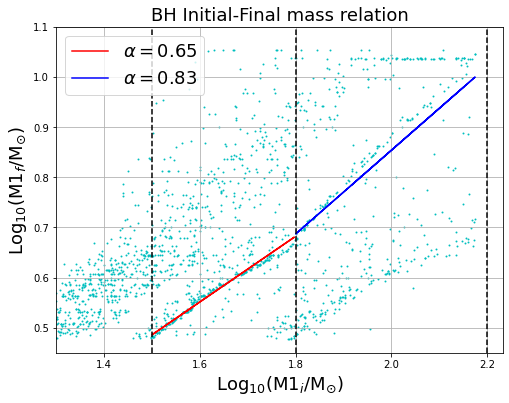

In [156]:
plt.figure(figsize=[8,6])
plt.scatter(np.log10(bh_ini_m1),np.log10(bh_final_m1),s=0.9,color="c")
plt.plot(np.log10(M1_bh_sort4["m1_ini"]),alpha1*np.log10(M1_bh_sort4["m1_ini"])+b1,"r",label=r"$\alpha = %3.2f$"%(alpha1))
plt.plot(np.log10(Mb_bh_sort4["m1_ini"]),alpha2*np.log10(Mb_bh_sort4["m1_ini"])+b2,"b",label=r"$\alpha = %3.2f$"%(alpha2))
plt.grid()
plt.xlim(1.3,)
plt.ylim(mfa,1.1)
plt.axvline(mia,linestyle="--",color="k")
plt.axvline(mib,linestyle="--",color="k")
plt.axvline(mic,linestyle="--",color="k")
plt.xlabel(r'Log$_{10}$(M1$_{i}$/M$_{\odot}$)', size=18)
plt.ylabel(r'Log$_{10}$(M1$_{f}$/M$_{\odot}$)', size=18)
plt.title("BH Initial-Final mass relation",size=18)
plt.legend(prop={'size' : 18})
plt.savefig("Figures/sim1-ifm-BH.pdf")
#plt.axhline(mfa,linestyle="--",color="k")
#plt.axhline(mfb,linestyle="--",color="k")
#plt.axhline(mfc,linestyle="--",color="k")